### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
from tqdm import tqdm

In [2]:
seed_value = 107

np.random.seed(seed_value)
torch.manual_seed(seed_value)
torch.cuda.manual_seed(seed_value)

### Data Cleaning and Preprocessing 

In [3]:
df = pd.read_csv("creditcard.csv")
rows, cols = df.shape
print(f"Shape of DataFrame : {df.shape}")
df.head()

Shape of DataFrame : (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print(f"Total NULL values in DataFrame : {df.isnull().sum().sum()}")
df.info()

Total NULL values in DataFrame : 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     28480

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


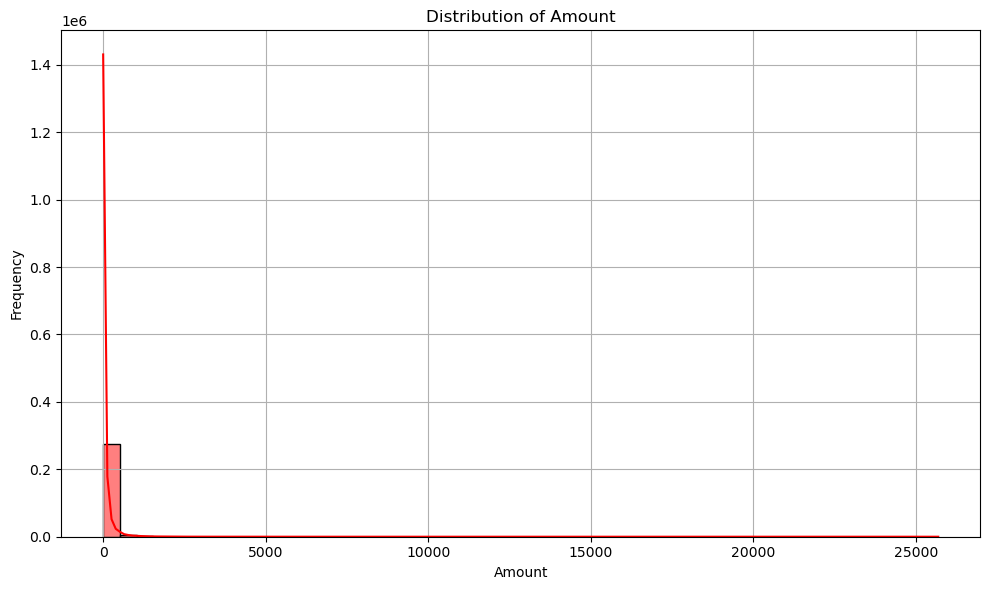

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, color='red', kde=True)
plt.title("Distribution of Amount")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
df = df[df['Amount'] > 0]
print(f"Number of transactions with Amount <= 0: {rows - df.shape[0]}")

Number of transactions with Amount <= 0: 1825


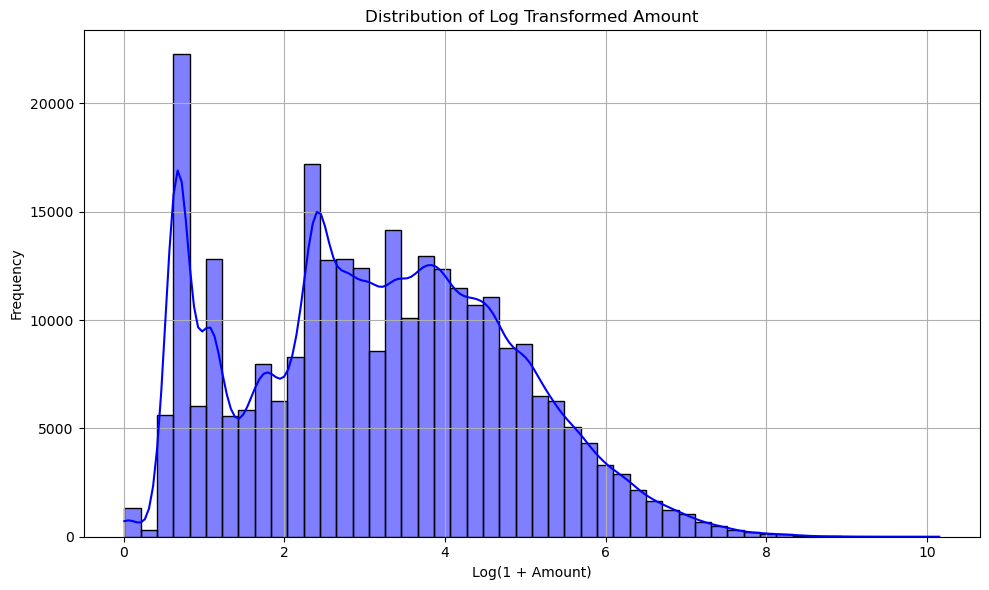

In [8]:
df['Amount'] = np.log1p(df['Amount'])
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, color='blue', kde=True)
plt.title("Distribution of Log Transformed Amount")
plt.xlabel("Log(1 + Amount)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
class_counts = df['Class'].value_counts()
print("Class Distribution:")
print(class_counts)

print("\nPercentage Distribution:")
print(class_counts / class_counts.sum() * 100)

Class Distribution:
Class
0    282517
1       465
Name: count, dtype: int64

Percentage Distribution:
Class
0    99.835679
1     0.164321
Name: count, dtype: float64


In [10]:
df['Hour'] = (df['Time'] % 86400) / 3600

df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)

df.drop(columns=['Time', 'Hour'], inplace=True)

In [11]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,Class,Hour_sin,Hour_cos
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.014760,0,0.000000,1.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1.305626,0,0.000000,1.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.939276,0,0.000073,1.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.824306,0,0.000073,1.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.262539,0,0.000145,1.0


In [12]:
normal_data = df[df['Class'] == 0]
fraud_data = df[df['Class'] == 1]

X_normal = normal_data.drop(columns=['Class'])

X_train_normal, X_test_normal= train_test_split(
    X_normal,
    test_size=0.2,
    shuffle = True,
    random_state=seed_value
)

print(f"X_train shape : {X_train_normal.shape}")
print(f"X_test_normal shape: {X_test_normal.shape}")

X_train shape : (226013, 31)
X_test_normal shape: (56504, 31)


### Model Architecture

In [13]:
class AutoencoderWithLSTM(nn.Module):
    def __init__(self, input_dim, features):
        super(AutoencoderWithLSTM, self).__init__()

        encoding_dim = features[-1] * 2

        self.encoder = nn.Sequential()
        previous_dim = input_dim
        for feature in features:
            self.encoder.add_module(f"Downsample_{feature}",nn.Linear(previous_dim, feature))
            self.encoder.add_module("ReLU", nn.ReLU())
            self.encoder.add_module("Dropout", nn.Dropout(0.01))
            previous_dim = feature

        self.bottleneck = nn.Linear(previous_dim, encoding_dim)

        self.lstm = nn.LSTM(input_size=encoding_dim, hidden_size=encoding_dim, num_layers=2, batch_first=True)

        self.decoder = nn.Sequential()
        previous_dim = encoding_dim
        for feature in reversed(features):
            self.decoder.add_module(f"Upsample_{feature}",nn.Linear(previous_dim, feature))
            self.decoder.add_module("ReLU", nn.ReLU())
            self.decoder.add_module("Dropout", nn.Dropout(0.01))
            previous_dim = feature

        self.decoder.add_module("output", nn.Linear(previous_dim, input_dim))

    def forward(self, x):
        encoded = self.encoder(x)
        encoded = self.bottleneck(encoded)

        encoded = encoded.unsqueeze(1)
        lstm_out, (hn, cn) = self.lstm(encoded)
        lstm_out = lstm_out[:, -1, :]

        decoded = self.decoder(lstm_out)
        return decoded

In [14]:
batch_size = 1024
learning_rate = 1e-3
epochs = 100
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_workers = 8

model = AutoencoderWithLSTM(input_dim=31, features=[64, 128, 256]).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
criterion = nn.L1Loss(reduction='sum')
def reconstruction_loss(recon_x, x):
    return criterion(recon_x, x)

X_train_tensor = torch.tensor(X_train_normal.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_normal.values, dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, X_train_tensor) 
val_dataset = TensorDataset(X_test_tensor, X_test_tensor)

train_loader = DataLoader(
    train_dataset, 
    batch_size=batch_size, 
    shuffle=True, 
    num_workers=num_workers
)

val_loader = DataLoader(
    val_dataset, 
    batch_size=batch_size,
    num_workers=num_workers
)

### Training 

In [ ]:
train_loss_list = []
val_loss_list = []
best_val_loss = float('inf')
epochs_without_improvement = 0
patience = 5
best_model_state = None

def train_and_validate(model, train_loader, val_loader, optimizer, epoch):
    global best_val_loss, epochs_without_improvement, best_model_state

    model.train()
    train_loss = 0

    train_progress_bar = tqdm(
        enumerate(train_loader), 
        total=len(train_loader), 
        desc=f"Epoch {epoch} Training", 
        unit="batch"
    )
        
    for batch_idx, (data, _) in train_progress_bar:
        data = data.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = reconstruction_loss(output,data)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    avg_train_loss = train_loss/len(train_loader)
    train_loss_list.append(avg_train_loss)

    model.eval()
    val_loss = 0

    val_progress_bar = tqdm(
        val_loader, 
        total=len(val_loader), 
        desc=f"Epoch {epoch} Validation", 
        unit="batch"
    )

    with torch.no_grad():
        for data, _ in val_progress_bar:
            data = data.to(device)
            output = model(data)
            loss = reconstruction_loss(output,data)
            val_loss += loss.item()

        avg_val_loss = val_loss/len(val_loader)
        val_loss_list.append(avg_val_loss)

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_without_improvement = 0
        best_model_state = model.state_dict()
    else:
        epochs_without_improvement += 1

    if epochs_without_improvement >= patience:
        print(f"Early stopping triggered after {epoch} epochs.")
        torch.save(best_model_state, "best_model.pth")
        return avg_train_loss, avg_val_loss, True

    
    print(f"Epoch {epoch}, Train Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}, Patience Level: {epochs_without_improvement}")

    return avg_train_loss, avg_val_loss, False    

In [ ]:
for epoch in range(1, epochs + 1):
    train_loss, val_loss, early_stopping = train_and_validate(model, train_loader, val_loader, optimizer, epoch)

    if early_stopping:
        print("Training stopped early.")
        break

if not early_stopping:
    print("Training completed without early stopping. Saving the best model.")
    torch.save(best_model_state, "best_model.pth")

In [ ]:
plt.plot(train_loss_list, label='Training Loss')
plt.plot(val_loss_list, label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

plt.legend()
plt.savefig('/content/training_metrics.png')
plt.show()

### Evaluating Model

In [15]:
best_model = AutoencoderWithLSTM(input_dim=31, features=[64, 128, 256])
best_model.load_state_dict(torch.load('best_model.pth', weights_only=True))

device_eval = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
best_model.to(device_eval)

AutoencoderWithLSTM(
  (encoder): Sequential(
    (Downsample_64): Linear(in_features=31, out_features=64, bias=True)
    (ReLU): ReLU()
    (Dropout): Dropout(p=0.01, inplace=False)
    (Downsample_128): Linear(in_features=64, out_features=128, bias=True)
    (Downsample_256): Linear(in_features=128, out_features=256, bias=True)
  )
  (bottleneck): Linear(in_features=256, out_features=512, bias=True)
  (lstm): LSTM(512, 512, num_layers=2, batch_first=True)
  (decoder): Sequential(
    (Upsample_256): Linear(in_features=512, out_features=256, bias=True)
    (ReLU): ReLU()
    (Dropout): Dropout(p=0.01, inplace=False)
    (Upsample_128): Linear(in_features=256, out_features=128, bias=True)
    (Upsample_64): Linear(in_features=128, out_features=64, bias=True)
    (output): Linear(in_features=64, out_features=31, bias=True)
  )
)

In [16]:
total_params = sum(p.numel() for p in best_model.parameters())
trainable_params = sum(p.numel() for p in best_model.parameters() if p.requires_grad)
non_trainable_params = total_params - trainable_params

print(f"Total parameters: {total_params}")
print(f"Trainable parameters: {trainable_params}")
print(f"Non-trainable parameters: {non_trainable_params}")

Total parameters: 4551967
Trainable parameters: 4551967
Non-trainable parameters: 0


In [29]:
X_test_normal['Class'] = 0
test_data = pd.concat([X_test_normal, fraud_data], axis=0).reset_index(drop=True)
test_data = test_data.sample(frac=1, random_state=seed_value).reset_index(drop=True)

test_data_features = test_data.drop(columns=['Class'])
test_data_labels = test_data['Class']

In [30]:
reconstruction_loss_list = []
test_data_tensor = torch.tensor(test_data_features.values, dtype=torch.float32)

best_model.eval()
with torch.no_grad():
    for tensor_data in test_data_tensor:
        tensor_data = tensor_data.unsqueeze(0).to(device_eval)
        predictions = best_model(tensor_data)
        loss = reconstruction_loss(predictions, tensor_data)
        reconstruction_loss_list.append(loss.item())
        
print(predictions)

tensor([[-9.2913e-01,  3.7883e-01, -1.8083e-01, -1.7945e+00, -3.3177e-01,
         -6.5358e-01,  1.2239e+00,  2.5184e-01,  7.2663e-01, -1.7535e+00,
         -9.9272e-01,  3.8423e-01, -4.9358e-01,  5.4353e-01,  1.3992e-01,
         -9.7449e-01,  1.3527e-01, -3.5921e-01, -7.3776e-02,  1.5559e-01,
          2.3902e-01,  5.8507e-01,  2.4351e-01, -2.2150e-01, -8.7157e-04,
         -7.3025e-01,  2.6788e-01,  1.9365e-01,  5.1915e+00, -3.5897e-01,
          9.1300e-01]], device='cuda:0')


In [31]:
threshold = 20
predicted_labels = [1 if loss > threshold else 0 for loss in reconstruction_loss_list]

Accuracy: 0.9979
Precision: 0.9370
Recall: 0.8000
F1-Score: 0.8631
Confusion Matrix:
[[56479    25]
 [   93   372]]


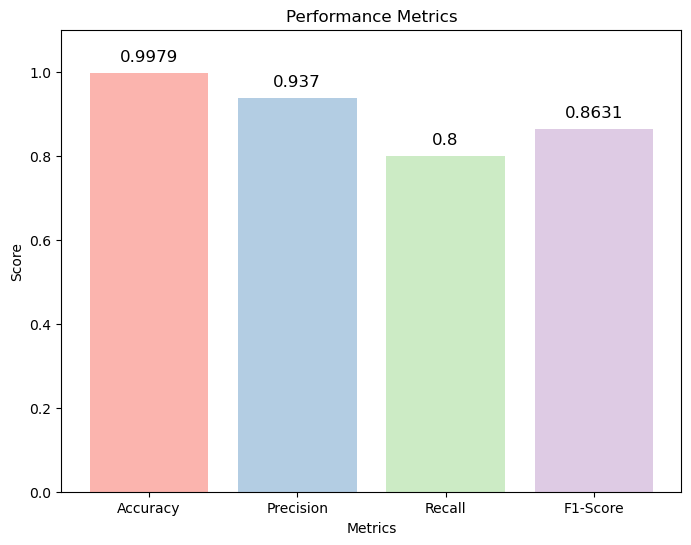

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(test_data_labels, predicted_labels)

precision = precision_score(test_data_labels, predicted_labels)
recall = recall_score(test_data_labels, predicted_labels)
f1 = f1_score(test_data_labels, predicted_labels)

cm = confusion_matrix(test_data_labels, predicted_labels)

scores = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1
}

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Confusion Matrix:\n{cm}")

plt.figure(figsize=(8, 6))
bars = plt.bar(scores.keys(), scores.values(), color=plt.cm.Pastel1(range(4)))
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 4), ha='center', va='bottom', color='black', fontsize=12)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Performance Metrics')
plt.ylim(0, 1.1)
# plt.savefig("graphs/performance_matrix.png")
plt.show()

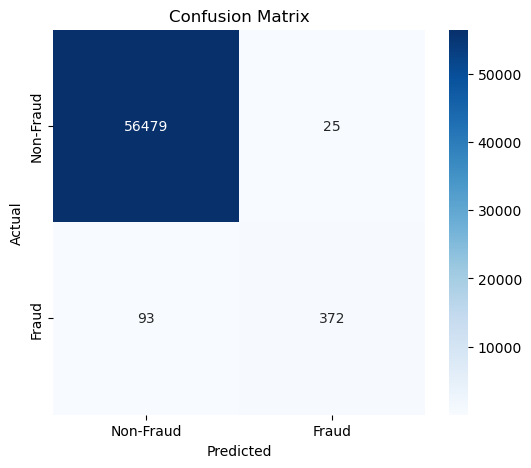

In [33]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
# plt.savefig('graphs/confusion_matrix.png')
plt.show()

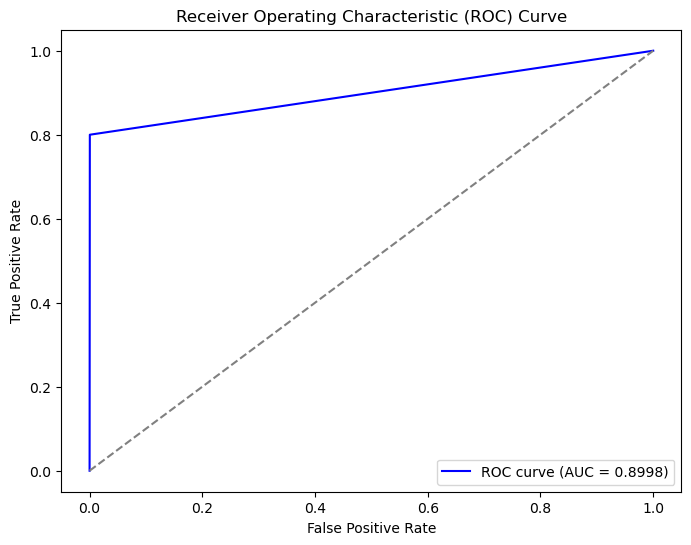

In [34]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

fpr, tpr, thresholds = roc_curve(test_data_labels, predicted_labels)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
# plt.savefig('graphs/roc_curve.png')
plt.show()